In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
%load_ext autoreload
%autoreload 2

%run proj1_helpers.py
%run implementations.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, x, ids = load_csv_data(DATA_TRAIN_PATH)

In [92]:
# pre pre processing, log of exponential data,augmentation by adding ones.
x = np.where(x==-999, np.nan, x)
cols = [0, 1, 2, 3, 5, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29]
x[:, cols] = np.log1p(x[:, cols])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.


"y=1" ratio of y: 0.342668


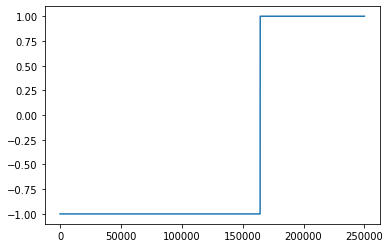

In [93]:
print('"y=1" ratio of y: '+str(np.sum(y==1)/len(y)))
plt.plot(np.sort(y))

In [95]:
rows0 = x[:,22]==0
rows1 = x[:,22]==1
rows2 = np.logical_or(x[:,22]==2, x[:,22]==3)

In [103]:
y0, x0 = y[rows0], x[np.where(rows0)]
y1, x1 = y[rows1], x[np.where(rows1)]
y2, x2 = y[rows2], x[np.where(rows2)]

In [104]:
x0 = np.delete(x0, [4, 5, 6, 12, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29], axis = 1)
x1 = np.delete(x1, [4, 5, 6, 12, 15, 18, 20, 22, 25, 26, 27, 28], axis = 1)
x2 = np.delete(x2, [15, 18, 20, 22, 28], axis = 1)

In [105]:
print(x0.shape)
print(x1.shape)
print(x2.shape)

(99913, 15)
(77544, 18)
(72543, 25)


In [106]:
# set median in first column
def set_median(x):
    median = np.nanmedian(x, axis=0)
    inds_nan = np.isnan(x)
    x[inds_nan] = median
    return x

In [107]:
x0[:,0] = set_median(x0[:,0])
x1[:,0] = set_median(x1[:,0])
x2[:,0] = set_median(x2[:,0])

In [108]:
x0, mean_x0, std_x0 = standardize(x0)
x1, mean_x1, std_x1 = standardize(x1)
x2, mean_x2, std_x2 = standardize(x2)

In [109]:
x0 = np.insert(x0, 0, 1, axis=1)
x1 = np.insert(x1, 0, 1, axis=1)
x2 = np.insert(x2, 0, 1, axis=1)

In [110]:
print(x0.shape)
print(x1.shape)
print(x2.shape)

(99913, 16)
(77544, 19)
(72543, 26)


In [112]:
ratio = 0.90
x0, y0, x0_test, y0_test = split_data(x0, y0, ratio, seed=1)
x1, y1, x1_test, y1_test = split_data(x1, y1, ratio, seed=1)
x2, y2, x2_test, y2_test = split_data(x2, y2, ratio, seed=1)

## RIDGE

In [113]:
%run implementations.py

<Figure size 432x288 with 0 Axes>

In [133]:
## Set hyperparameters
lambdas0 = np.logspace(-5, 5, 120)
lambdas1 = np.logspace(-5, 5, 120)
lambdas2 = np.logspace(-5, 5, 120)

degrees0 = [i for i in range(7,14)]
degrees1 = [i for i in range(8,15)]
degrees2 = [i for i in range(11,18)]

In [134]:
def grid_search_ridge_regression(y_train,x_train,y_test,x_test,lambdas,degrees):
    # define lists to store the loss of training data and test data
    data = []
    for degree in degrees:
        data_nested = []        
        phi_x_train = build_poly(x_train, degree)
        phi_x_test = build_poly(x_test, degree)
        for lambda_ in lambdas:
            w = ridge_regression(y_train,phi_x_train,lambda_)[0]
            y_pred_train = predict_labels(w, phi_x_train)
            acc_train,_ = metrics(y_train,y_pred_train)
            y_pred_test = predict_labels(w, phi_x_test)
            acc_test,_ = metrics(y_test,y_pred_test)
            data_nested.append([acc_train, acc_test, degree, lambda_, w])
        data_nested = np.array(data_nested)
        index_best_value = np.where(data_nested[:,1] == np.amax(data_nested[:,1]))
        best_value = data_nested[index_best_value][0]
        print("Running :: Training accuracy: ",best_value[0]," ,testing accuracy: ",best_value[1]," ,degree: ",best_value[2]," , lambda : ",best_value[3])
        data.append(best_value)
    data = np.array(data)
    index_best_value = np.where(data[:,1] == np.amax(data[:,1]))
    best_value = data[index_best_value][0]
    acc_train, acc_test, degree, lambda_, w = best_value[0], best_value[1], best_value[2], best_value[3], best_value[4]
    print("Final :: Training accuracy: ",acc_train," ,testing accuracy: ",acc_test," ,degree: ",degree," , lambda : ",lambda_)
    
    return degree, lambda_, w

In [135]:
degree0, lambda0, w0 = grid_search_ridge_regression(y0, x0, y0_test, x0_test, lambdas0, degrees0)

Running :: Training accuracy:  0.8450998577876708  ,testing accuracy:  0.8486768957082499  ,degree:  7  , lambda :  0.0004793715645558219
Running :: Training accuracy:  0.8447907005502999  ,testing accuracy:  0.8482321547698466  ,degree:  8  , lambda :  67909.8502995572
Running :: Training accuracy:  0.84591603289433  ,testing accuracy:  0.8491216366466533  ,degree:  9  , lambda :  3727.5937203149533
Running :: Training accuracy:  0.8459283991838249  ,testing accuracy:  0.8484545252390483  ,degree:  10  , lambda :  792.7927389450606
Running :: Training accuracy:  0.8446052062078774  ,testing accuracy:  0.8492328218812542  ,degree:  11  , lambda :  3727.5937203149533
Running :: Training accuracy:  0.8464725159215978  ,testing accuracy:  0.8490104514120524  ,degree:  12  , lambda :  4523.370744772114
Running :: Training accuracy:  0.8157793853954121  ,testing accuracy:  0.818545697131421  ,degree:  13  , lambda :  100000.0
Final :: Training accuracy:  0.8446052062078774  ,testing accurac

In [136]:
degree1, lambda1, w1 = grid_search_ridge_regression(y1, x1, y1_test, x1_test, lambdas1, degrees1)

Running :: Training accuracy:  0.8097609878743516  ,testing accuracy:  0.7966101694915254  ,degree:  8  , lambda :  6660.846290809168
Running :: Training accuracy:  0.8046370261926737  ,testing accuracy:  0.79689744326343  ,degree:  9  , lambda :  0.08903890941296735
Running :: Training accuracy:  0.8139142611629165  ,testing accuracy:  0.801924734271761  ,degree:  10  , lambda :  4523.370744772114
Running :: Training accuracy:  0.8139619999363483  ,testing accuracy:  0.8027865555874749  ,degree:  11  , lambda :  8082.822192522723
Running :: Training accuracy:  0.8099996817415105  ,testing accuracy:  0.7960356219477162  ,degree:  12  , lambda :  100000.0
Running :: Training accuracy:  0.7685146876292925  ,testing accuracy:  0.7622809537489227  ,degree:  13  , lambda :  67909.8502995572
Running :: Training accuracy:  0.7694217243244964  ,testing accuracy:  0.7598391266877335  ,degree:  14  , lambda :  25808.615404180768
Final :: Training accuracy:  0.8139619999363483  ,testing accuracy:

In [137]:
degree2, lambda2, w2 = grid_search_ridge_regression(y2, x2, y2_test, x2_test, lambdas2, degrees2)

Running :: Training accuracy:  0.8457076763450188  ,testing accuracy:  0.8493717437940546  ,degree:  11  , lambda :  4.701851489299857e-05
Running :: Training accuracy:  0.8467792689357214  ,testing accuracy:  0.8507508427827153  ,degree:  12  , lambda :  2.6312860738959445e-05
Running :: Training accuracy:  0.8470003912163426  ,testing accuracy:  0.8502911431198283  ,degree:  13  , lambda :  14443.21464727285
Running :: Training accuracy:  0.8459798268442449  ,testing accuracy:  0.8533558075390745  ,degree:  14  , lambda :  0.00022107407427431256
Running :: Training accuracy:  0.8121311085030022  ,testing accuracy:  0.8145878026356114  ,degree:  15  , lambda :  82407.43309893666
Running :: Training accuracy:  0.7052269905257608  ,testing accuracy:  0.7160588415568495  ,degree:  16  , lambda :  25808.615404180768
Running :: Training accuracy:  0.6474800564712286  ,testing accuracy:  0.6444989273674533  ,degree:  17  , lambda :  24.353120734334173
Final :: Training accuracy:  0.84597982

## Check cross validation

In [141]:
%run proj1_helpers.py
cv0 = cross_validation(y0, x0, 5, lambda0, degree0)
cv1 = cross_validation(y1, x1, 5, lambda1, degree1)
cv2 = cross_validation(y2, x2, 5, lambda2, degree2)

ValueError: operands could not be broadcast together with shapes (16173,) (16173,313) 

## Results

In [121]:
DATA_TEST_PATH = 'test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [130]:
# pre pre processing, log of exponential data,augmentation by adding ones.
cols = [0, 1, 2, 3, 5, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29]
x_validate = np.copy(tX_test)
x_validate[:, cols] = np.log1p(x_validate[:, cols])

rows0_validate = x_validate[:,22]==0
rows1_validate = x_validate[:,22]==1
rows2_validate = np.logical_or(x_validate[:,22]==2, x_validate[:,22]==3)
x0_validate = x_validate[np.where(rows0_validate)]
x1_validate = x_validate[np.where(rows1_validate)]
x2_validate = x_validate[np.where(rows2_validate)]

x0_validate = np.delete(x0_validate, [4, 5, 6, 12, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29], axis = 1)
x1_validate = np.delete(x1_validate, [4, 5, 6, 12, 15, 18, 20, 22, 25, 26, 27, 28], axis = 1)
x2_validate = np.delete(x2_validate, [15, 18, 20, 22, 28], axis = 1)

x0_validate[:,0] = set_median(x0_validate[:,0])
x1_validate[:,0] = set_median(x1_validate[:,0])
x2_validate[:,0] = set_median(x2_validate[:,0])

x0_validate = (x0_validate - mean_x0)/(std_x0)
x1_validate = (x1_validate - mean_x1)/(std_x1)
x2_validate = (x2_validate - mean_x2)/(std_x2)

x0_validate = np.insert(x0_validate, 0, 1, axis=1)
x1_validate = np.insert(x1_validate, 0, 1, axis=1)
x2_validate = np.insert(x2_validate, 0, 1, axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.


In [131]:
print(x0_validate.shape)
print(x1_validate.shape)
print(x2_validate.shape)

(227458, 16)
(175338, 19)
(165442, 26)


In [132]:
phi_x0_validate = build_poly(copy.deepcopy(x0_validate), degree0)
phi_x1_validate = build_poly(copy.deepcopy(x1_validate), degree1)
phi_x2_validate = build_poly(copy.deepcopy(x2_validate), degree2)

y_pred0 = predict_labels(w0, phi_x0_validate)
y_pred1 = predict_labels(w1, phi_x1_validate)
y_pred2 = predict_labels(w2, phi_x2_validate)

total_length = y_pred0.shape[0] + y_pred1.shape[0] + y_pred2.shape[0]
y_pred = np.zeros((total_length,))
y_pred[np.where(rows0_validate)] = y_pred0
y_pred[np.where(rows1_validate)] = y_pred1
y_pred[np.where(rows2_validate)] = y_pred2

time_day = datetime.datetime.now().day
time_hour = datetime.datetime.now().hour
time_min = datetime.datetime.now().minute
time_second = datetime.datetime.now().second

time = str(time_day)+"-"+str(time_hour)+"-"+str(time_min)+"-"+str(time_second)

OUTPUT_PATH = 'submission'+"_"+str(time)+".csv"
#print(weights_LS.shape)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

## Let'sSeeeeee

In [17]:
def Poly_Neural_Net(y_train, x_train,y_test, x_test, degree, eps):
    # define lists to store the loss of training data and test data
    
    phi_x_train = build_poly(x_train, degree)
    phi_x_test = build_poly(x_test, degree)
    y_train = np.where(y_train==-1, 0, y_train)
    y_test = np.where(y_test==-1, 0, y_test)
        
    labels = [0, 1]
    layer_array = [[len(labels), 'sigmoid']]
    input_dims = phi_x_train.shape[1]
    neural_net = create_neural_network(layer_array, input_dims)
    neural_net = train_network(phi_x_train, y_train, labels, neural_net, epochs=eps)
    
    y_pred_train = []
    for i in range(len(y_train)):
        y_pred_train.append((predict(phi_x_train[i], neural_net))[0])
    
    y_pred_test = []
    for i in range(len(y_test)):
        y_pred_test.append((predict(phi_x_test[i], neural_net))[0])
        
    y_pred_train = np.where(y_pred_train==0, -1, y_pred_train)
    y_pred_test = np.where(y_pred_test==0, -1, y_pred_test)
    
    acc_train,_ = metrics(y_train,y_pred_train)
    acc_test,_ = metrics(y_test,y_pred_test)
    
    data = []
    data_nested = []        
        
    data_nested.append([acc_train, acc_test, degree])
    data_nested = np.array(data_nested)
    index_best_value = np.where(data_nested[:,1] == np.amax(data_nested[:,1]))
    best_value = data_nested[index_best_value][0]
    print("Running :: Training accuracy: ",best_value[0]," ,testing accuracy: ",best_value[1])
    data.append(best_value)
        
    data = np.array(data)
    index_best_value = np.where(data[:,1] == np.amax(data[:,1]))
    best_value = data[index_best_value][0]
    acc_train, acc_test = best_value[0], best_value[1]
    print("Final :: Training accuracy: ",acc_train," ,testing accuracy: ",acc_test)
    
    return degree

In [21]:
degree = 1
epochs=300

degree0 = Poly_Neural_Net(y0, x0, y0_test, x0_test, degree, epochs)

KeyboardInterrupt: 

In [ ]:
degree = 1
epochs=300

degree0 = Poly_Neural_Net(y1, x1, y1_test, x1_test, degree, epochs)

In [ ]:
degree = 1
epochs=300

degree0 = Poly_Neural_Net(y2, x2, y2_test, x2_test, degree, epochs)